# Predicting Churn

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from datetime import date, datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import joblib


In [2]:
merchant_churn_data = pd.read_csv("merchant_churn_data.csv")

In [3]:
merchant_churn_data.reset_index()
merchant_attributes = merchant_churn_data.drop(columns=["merchant_id","churn"])
churn_label = merchant_churn_data["churn"]
X_train, X_test, y_train, y_test = train_test_split(
    merchant_attributes, churn_label, test_size=0.33, random_state=7)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(p=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[57, 12],
       [26, 14]])

 - confusion matrix: row for true label, column for predicted label
 - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 - ravel() - flatten the array, default is row major
 - https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

In [19]:
metrics.confusion_matrix(y_test, knn.predict(X_test)).ravel()

array([57, 12, 26, 14])

In [18]:
metrics.confusion_matrix(y_test, knn.predict(X_test), labels=[0,1]).ravel()

array([57, 12, 26, 14])

In [17]:
metrics.confusion_matrix(y_test, knn.predict(X_test), labels=[1,0]).ravel()

array([14, 26, 12, 57])

In [13]:
tn,fp,fn,tp  = metrics.confusion_matrix(y_test, knn.predict(X_test)).ravel()/(len(y_test))
tn,fp,fn,tp 

(0.5229357798165137,
 0.11009174311926606,
 0.23853211009174313,
 0.12844036697247707)

 - in our data, 0 is negative (for predicting churn), 1 is positive

In [6]:
score,cv_score

(0.8715596330275229,
 array([0.81818182, 0.72727273, 0.90909091, 0.81818182, 0.90909091,
        0.77272727, 0.68181818, 0.68181818, 0.81818182, 0.72727273]))

/Users/yingli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


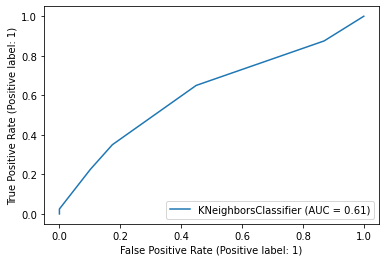

In [7]:
metrics.plot_roc_curve(knn, X_test, y_test)

In [8]:
score = knn.score(X_test, y_test)
cv_score = cross_val_score(knn, X_train, y_train, cv=10)
score, cv_score

(0.6513761467889908,
 array([0.54545455, 0.77272727, 0.5       , 0.72727273, 0.68181818,
        0.59090909, 0.5       , 0.63636364, 0.63636364, 0.72727273]))

In [9]:
print(classification_report(knn.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        83
           1       0.35      0.54      0.42        26

    accuracy                           0.65       109
   macro avg       0.59      0.61      0.59       109
weighted avg       0.71      0.65      0.67       109



(0.5229357798165137,
 0.11009174311926606,
 0.23853211009174313,
 0.12844036697247707)

In [10]:
print(knn.predict_proba(X_test))

[[0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [1.  0. ]
 [0.4 0.6]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]

In [11]:
knn.predict(X_test),y_test

(array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]),
 97     1
 217    0
 287    1
 296    0
 208    1
       ..
 237    0
 141    0
 193    1
 269    0
 24     1
 Name: churn, Length: 109, dtype: int64)

In [20]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
print(rf.predict(X_test))

[0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0]


In [21]:
print(classification_report(rf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        77
           1       0.65      0.81      0.72        32

    accuracy                           0.82       109
   macro avg       0.78      0.82      0.79       109
weighted avg       0.84      0.82      0.82       109



In [24]:
print(classification_report(knn.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        83
           1       0.35      0.54      0.42        26

    accuracy                           0.65       109
   macro avg       0.59      0.61      0.59       109
weighted avg       0.71      0.65      0.67       109



In [22]:
tn,fp,fn,tp  = metrics.confusion_matrix(y_test, rf.predict(X_test)).ravel()/(len(y_test))
tn,fp,fn,tp 

(0.5779816513761468,
 0.05504587155963303,
 0.12844036697247707,
 0.23853211009174313)

In [23]:
tn,fp,fn,tp  = metrics.confusion_matrix(y_test, knn.predict(X_test)).ravel()/(len(y_test))
tn,fp,fn,tp 

(0.5229357798165137,
 0.11009174311926606,
 0.23853211009174313,
 0.12844036697247707)